## Import data

In [1]:
import pandas as pd
import numpy as np

In [2]:
ACAdata = pd.read_csv("/Users/ljy/Desktop/HUDK4050 data mining/ACA/aca3_dataset/CollegeScorecard.csv")
ACAdata.shape

/Users/ljy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(7804, 1725)

## Select variables

In [5]:
ACAdata2 = ACAdata[['UNITID', 'PCIP13', 'CIP13BACHL', 'ADM_RATE_ALL', 'RET_FT4', 'RET_PT4', 'RET_FTL4', 'RET_PTL4', 'C150_4', 'C200_4', 'C200_L4', 'C150_4_POOLED','CDR3', 'PELL_RPY_3YR_RT', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'INEXPFTE', 'AVGFACSAL']]

## Convert missing values

In [6]:
ACAdata2 = ACAdata2.replace('PrivacySuppressed', 0.0)
ACAdata2 = ACAdata2.replace('nan', -1)
ACAdata2 = ACAdata2.fillna(-1)
ACAdata2

,UNITID,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL
0,100654,0.1490,2.0,0.8989,0.6314,0.5000,-1.0,-1.0,0.2914,0.3520,-1.0,0.308718,0.163,0.443586698,33611.5,14250,7459.0,7079.0
1,100663,0.0862,2.0,0.8673,0.8016,0.5000,-1.0,-1.0,0.5377,0.4881,-1.0,0.508550,0.080,0.732297853,23117,11886,17208.0,10170.0
2,100690,0.0000,0.0,-1.0000,0.3750,0.3333,-1.0,-1.0,0.6667,0.3333,-1.0,0.285738,0.089,0.0,26995,9500,5123.0,3849.0
3,100706,0.0173,2.0,0.8062,0.8098,0.4444,-1.0,-1.0,0.4835,0.5048,-1.0,0.478211,0.077,0.738341969,24738,10500,9352.0,9341.0
4,100724,0.2150,2.0,0.5125,0.6219,0.3023,-1.0,-1.0,0.2517,0.3013,-1.0,0.257482,0.191,0.320016821,33452,12500,7393.0,6557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0
7800,48285704,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0
7801,48285705,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0
7802,48285706,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0


## PCA

In [7]:
from sklearn.decomposition import PCA
ACAdata2_noid = ACAdata2.drop(['UNITID'], axis = 1)
pca = PCA(n_components=7)
pca.fit(ACAdata2_noid)
print("The principal components are:")
print(pca.components_)
print("The explained variances are:")
print(pca.explained_variance_)

The principal components are:
[[ 2.77641105e-06  2.50678393e-05  3.50901303e-05  3.96504824e-05
   2.27734208e-05 -3.89846410e-05 -2.11188504e-05  3.55880922e-05
   3.38941033e-05 -3.52052561e-05  3.56172227e-05  1.35622677e-06
   2.73302258e-05  9.30864981e-01  3.41951520e-01 -2.48607883e-02
   1.26259549e-01]
 [ 1.87663629e-07  1.41807996e-05  1.41493232e-05  1.78883947e-05
   5.67453041e-06 -1.87116583e-05 -8.14052585e-06  1.65060937e-05
   1.74757307e-05 -1.68524359e-05  1.68709781e-05 -2.77119671e-06
  -3.89603502e-06 -5.99528914e-03  3.67781275e-02  9.89529889e-01
   1.39434653e-01]
 [-1.42473650e-05 -7.68112983e-05 -5.92954519e-05 -7.39490922e-05
  -4.72501383e-05  4.33708591e-05 -8.00016492e-06 -6.96387105e-05
  -6.61206115e-05  4.47197770e-05 -6.98773602e-05  2.85766821e-06
  -2.08727610e-05  2.76936977e-01 -4.30854170e-01  1.37162717e-01
  -8.47854320e-01]
 [ 3.90751469e-06 -2.57311045e-05  4.84804781e-06 -3.10112176e-05
  -1.12321817e-05  4.62050528e-05  1.35842157e-05 -3.35

In [8]:
# The first and second components explaining substantially more variances than other components.

## Reduce dimensions

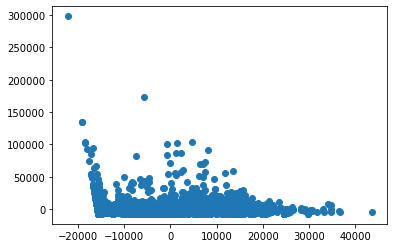

In [10]:
import matplotlib.pyplot as plt
ACAdata2_dr = pca.transform(ACAdata2_noid)
plt.scatter(ACAdata2_dr[:,0], ACAdata2_dr[:,1])

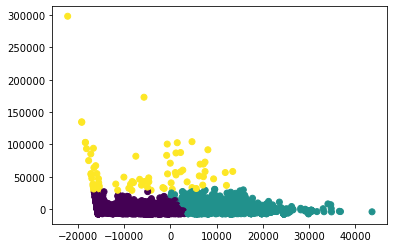

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(ACAdata2_dr)
cluster_kmeans = kmeans.predict(ACAdata2_dr)

plt.scatter(ACAdata2_dr[:, 0], ACAdata2_dr[:, 1], c=cluster_kmeans, cmap='viridis') 

## Clustering

In [12]:
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import silhouette_score

After trying the "cluster=1,2,3,4", we decided to choose the three centers. Clustering in three centers seems more reasonable, even though the cluster 2 dose not look good. However, the cluster 2 in two and four centers also looks like in 3 centers, thus we choose in three centers. In three centers, the silhouette coefficient has the largest value which is 0.50.

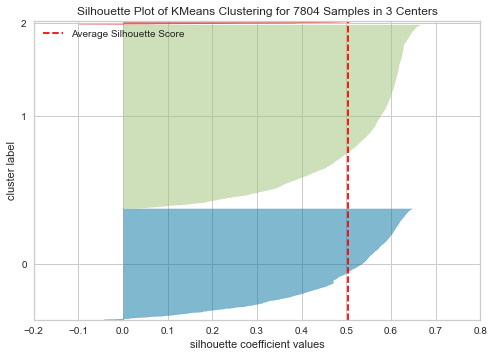

Silhouetter Score: 0.5027060872621795


In [13]:
ACAdata2kmeans3 = KMeans(n_clusters=3)
ACAdata2kmeans3.fit(ACAdata2_noid)
cluster_ACAdata23 = ACAdata2kmeans3.predict(ACAdata2_noid)
silhouette_visualizer(ACAdata2kmeans3, ACAdata2_noid, colors='yellowbrick')
silhouetteScore3 = silhouette_score(ACAdata2_noid, cluster_ACAdata23, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

In [18]:
ACAdata23cluster = ACAdata2_noid.copy(deep=True)
ACAdata23cluster['cluster'] = cluster_ACAdata23
ACAdata23cluster

,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL,cluster
0,0.1490,2.0,0.8989,0.6314,0.5000,-1.0,-1.0,0.2914,0.3520,-1.0,0.308718,0.163,0.443586698,33611.5,14250,7459.0,7079.0,0
1,0.0862,2.0,0.8673,0.8016,0.5000,-1.0,-1.0,0.5377,0.4881,-1.0,0.508550,0.080,0.732297853,23117,11886,17208.0,10170.0,0
2,0.0000,0.0,-1.0000,0.3750,0.3333,-1.0,-1.0,0.6667,0.3333,-1.0,0.285738,0.089,0.0,26995,9500,5123.0,3849.0,0
3,0.0173,2.0,0.8062,0.8098,0.4444,-1.0,-1.0,0.4835,0.5048,-1.0,0.478211,0.077,0.738341969,24738,10500,9352.0,9341.0,0
4,0.2150,2.0,0.5125,0.6219,0.3023,-1.0,-1.0,0.2517,0.3013,-1.0,0.257482,0.191,0.320016821,33452,12500,7393.0,6557.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0,1
7800,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0,1
7801,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0,1
7802,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0,1


In [17]:
ACAdata2merge= pd.merge(ACAdata2, ACAdata23cluster)

## mask data by classifying cluster in 0,1,2

In [16]:
ACAdata2mask=(ACAdata2merge['cluster']==0)
ACAdata2merge[ACAdata2mask]

,UNITID,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL,cluster
0,100654,0.1490,2.0,0.8989,0.6314,0.5000,-1.0,-1.0,0.2914,0.3520,-1.0,0.308718,0.163,0.443586698,33611.5,14250,7459.0,7079.0,0
1,100663,0.0862,2.0,0.8673,0.8016,0.5000,-1.0,-1.0,0.5377,0.4881,-1.0,0.508550,0.080,0.732297853,23117,11886,17208.0,10170.0,0
2,100690,0.0000,0.0,-1.0000,0.3750,0.3333,-1.0,-1.0,0.6667,0.3333,-1.0,0.285738,0.089,0.0,26995,9500,5123.0,3849.0,0
3,100706,0.0173,2.0,0.8062,0.8098,0.4444,-1.0,-1.0,0.4835,0.5048,-1.0,0.478211,0.077,0.738341969,24738,10500,9352.0,9341.0,0
4,100724,0.2150,2.0,0.5125,0.6219,0.3023,-1.0,-1.0,0.2517,0.3013,-1.0,0.257482,0.191,0.320016821,33452,12500,7393.0,6557.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15044,43821206,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.218,0.468199234,19811,7218,-1.0,-1.0,0
15045,43821206,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.218,0.468199234,19811,7218,-1.0,-1.0,0
15046,43821206,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.218,0.468199234,19811,7218,-1.0,-1.0,0
15047,43821206,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.218,0.468199234,19811,7218,-1.0,-1.0,0


In [19]:
ACAdata2mask=(ACAdata2merge['cluster']==1)
ACAdata2merge[ACAdata2mask]

,UNITID,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL,cluster
6,100760,0.0,0.0,-1.0,-1.0,-1.0,0.4267,0.4159,-1.0,-1.0,0.2357,-1.0,0.263,0.370833333,0.0,7500,5935.0,5805.0,1
11,101028,0.0,0.0,-1.0,-1.0,-1.0,0.5165,0.3293,-1.0,-1.0,0.2491,-1.0,0.149,0.470769231,7000,4051,4459.0,5749.0,1
14,101143,0.0,0.0,-1.0,-1.0,-1.0,0.5411,0.4500,-1.0,-1.0,0.2369,-1.0,0.250,0.456521739,11073,5999,5930.0,6257.0,1
15,101161,0.0,0.0,-1.0,-1.0,-1.0,0.5211,0.3981,-1.0,-1.0,0.1542,-1.0,0.162,0.526565465,9153,5500,4101.0,6116.0,1
17,101240,0.0,0.0,-1.0,-1.0,-1.0,0.5589,0.3865,-1.0,-1.0,0.1926,-1.0,0.285,-1,-1,0.0,5876.0,5950.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15111,45775802,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0,0.461,0,16827,4750,-1.0,-1.0,1
15112,45920401,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0,0.012,1,10281,6118,-1.0,-1.0,1
15113,47647001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0,0.000,-1,15847,4750,-1.0,-1.0,1
15114,47691101,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0,0.000,-1,9500,4750,-1.0,-1.0,1


In [20]:
ACAdata2mask=(ACAdata2merge['cluster']==2)
ACAdata2merge[ACAdata2mask]

,UNITID,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL,cluster
73,103778,0.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.012,-1,0.0,-1,53366.0,10953.0,2
134,106263,0.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.033,0.901734104,12820,10500,60962.0,7805.0,2
233,110404,0.0,0.0,0.1055,0.9659,-1.00,-1.0000,-1.0,0.9307,0.8841,-1.0000,0.925129,0.000,0.0,18348.5,0.0,92854.0,16120.0,2
253,110662,0.0,1.0,0.2199,0.9626,0.75,-1.0000,-1.0,0.9031,0.9027,-1.0000,0.909258,0.022,0.904454343,15900,13244.5,38489.0,15089.0,2
256,110699,-1.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.003,-1,0.0,0.0,100690.0,11593.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,457989,0.0,0.0,-1.0000,-1.0000,-1.00,0.5278,-1.0,-1.0000,-1.0000,0.8889,-1.000000,0.000,-1,-1,-1,62818.0,-1.0,2
6591,458122,0.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.142,0.0,0.0,0.0,111294.0,-1.0,2
6837,461333,0.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.000,-1,-1,-1,142817.0,-1.0,2
7241,481030,-1.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.000,-1,-1,-1,38786.0,-1.0,2


Based on the observation of explained variance, we know that the first two components explained the most variance.In the first two principal component outputs, the last four variables are substantially different from other variables which illustrate their significance.The four variables are GRAD_DEBT_MDN (students borrower of federal loans who complete), WDRAW_DEBT_MDN (students who withdrew without completing ), INEXPFTE (Instructional expenditures per FTE student), and AVGFACSAL (the average faculty salary).

The first columns of component tells the significance of the completion of students who get loans and scholarships from schools. The higher the completion rate of students who get financial aid in the school, the more likely the underprivileged students would like to choose that school since the value of GRAD_DEBT_MDN is 9.308e^-1. The second columns of component indicates the significance of the school’s expenditure on underprivileged students’ options. The more instructional expenditure the school spends, the more likely the underprivileged students would like to choose the school since the value of INEXPFTE is 9.895e^-1.